   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
               Id          RI          Na          Mg          Al          Si  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   107.500000    1.518365   13.407850    2.684533    1.444907   72.650935   
std     61.920648    0.003037    0.816604    1.442408    0.499270    0.774546   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.250000    1.516523   12.907500    2.115000    1.190000   72.280000   
50%    107.500000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.750000  

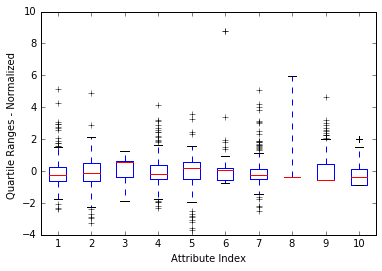

In [2]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
%matplotlib inline

target_url = ("https://archive.ics.uci.edu/ml/machine-"
              "learning-databases/glass/glass.data")

glass = pd.read_csv(target_url,header=None, prefix="V")
glass.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si',
                 'K', 'Ca', 'Ba', 'Fe', 'Type']

print(glass.head())

#generate statistical summaries
summary = glass.describe()
print(summary)
ncol1 = len(glass.columns)

glassNormalized = glass.iloc[:, 1:ncol1]
ncol2 = len(glassNormalized.columns)
summary2 = glassNormalized.describe()

for i in range(ncol2):
    mean = summary2.iloc[1, i]
    sd = summary2.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = \
        (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd

array = glassNormalized.values
boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges - Normalized "))
show()

Parallel Coordinate Plot for the Glass Data

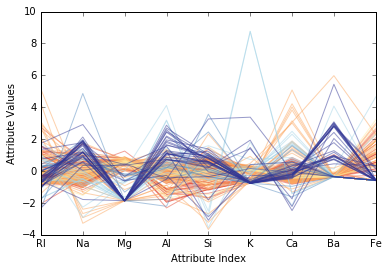

In [3]:
glassNormalized = glass
ncols = len(glassNormalized.columns)
nrows = len(glassNormalized.index)
summary = glassNormalized.describe()
nDataCol = ncols - 1

#normalize except for labels
for i in range(ncols - 1):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    glassNormalized.iloc[:,i:(i + 1)] = \
        (glassNormalized.iloc[:,i:(i + 1)] - mean) / sd

#Plot Parallel Coordinate Graph with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = glassNormalized.iloc[i,1:nDataCol]
    labelColor = glassNormalized.iloc[i,nDataCol]/7.0
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)

plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()



# Glass correlation heat map

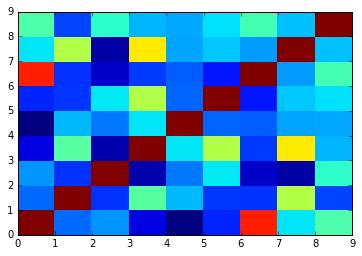

In [4]:
ncols = len(glass.columns)

#calculate correlation matrix
corMat = DataFrame(glass.iloc[:, 1:(ncols - 1)].corr())

#visualize correlations using heatmap
plot.pcolor(corMat)
plot.show()